# Assignment for Day-25

## Apply Naive Bayes Algorithms to Titanic DataSet

Construct the naive bayes for the titanic dataset with the following dependent variables:

___Survived, Pclass, Sex, SibSp, Parch & Embarked___

__Import Libraries__

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the dataset train.csv

In [167]:
DS_PATH="./datasets/train.csv"
def load_titanic_dataset(path=DS_PATH):
    return pd.read_csv(path)

In [168]:
titanic_ds = load_titanic_dataset()
titanic_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
titanic_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


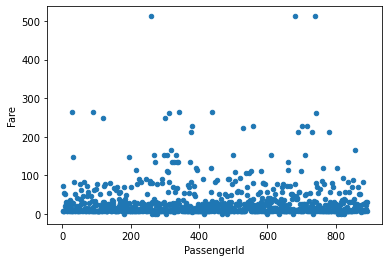

In [170]:
titanic_ds.plot(kind='scatter', x='PassengerId', y='Fare');

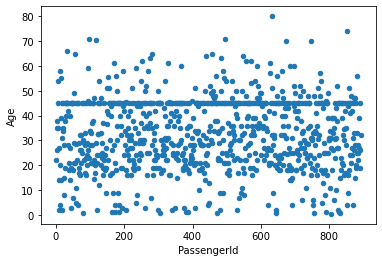

In [171]:
titanic_ds.plot(kind='scatter', x='PassengerId', y='Age');

## Drop Name and PassengerId from the dataset

In [172]:
unwanted_cols=["PassengerId", "Name", "Cabin"]
titanic_ds.drop(unwanted_cols, axis=1, inplace=True)
titanic_ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [173]:
titanic_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.6+ KB


In [174]:
titanic_ds.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [175]:
titanic_ds.Ticket.value_counts()

1601                 7
347082               7
CA. 2343             7
CA 2144              6
3101295              6
                    ..
A/5 21174            1
SOTON/O2 3101272     1
C.A. 29395           1
F.C. 12750           1
STON/O 2. 3101294    1
Name: Ticket, Length: 680, dtype: int64

In [176]:
titanic_ds.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [177]:
titanic_ds.Age.value_counts()

45.00    189
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [178]:
titanic_ds.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.8000      1
13.8583     1
7.6292      1
15.0500     1
8.6833      1
Name: Fare, Length: 247, dtype: int64

In [179]:
titanic_ds.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,32.699854,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.346821,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,45.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


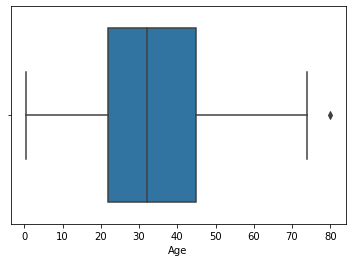

In [180]:
sns.boxplot(titanic_ds['Age'])
plt.show()

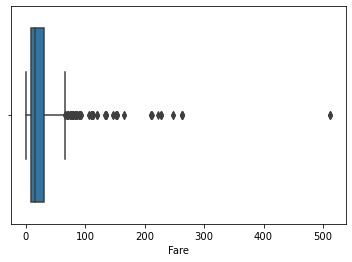

In [181]:
sns.boxplot(titanic_ds['Fare'])
plt.show();

In [182]:
titanic_ds.Age = pd.cut(titanic_ds.Age, bins=[0., 20, 50, 80], labels=["Cate-1", "Cate-2", "Cate-3"])

In [183]:
titanic_ds.Age.value_counts()

Cate-2    647
Cate-1    179
Cate-3     63
Name: Age, dtype: int64

In [184]:
titanic_ds.Fare = pd.cut(titanic_ds.Fare, bins=[0, 30., 100., 300., 500., 1000.], labels=["< 30", "30 to 100", "100 to 300", "300 to 500", "500 to 1000"])

In [185]:
titanic_ds.Fare.value_counts()

< 30           642
30 to 100      179
100 to 300      50
500 to 1000      3
300 to 500       0
Name: Fare, dtype: int64

In [186]:
titanic_ds.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare        15
Embarked     0
dtype: int64

In [189]:
titanic_ds.Fare.fillna("< 30", inplace=True)

In [190]:
titanic_ds.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## Define the pipeline for conversion

In [200]:
def prepare_titanic_pipeline(data, dv):
    cat_cols = ["Sex", "Ticket", "Embarked", "Age", "Fare"]
    num_cols = ["Survived", "Pclass", "SibSp", "Parch"]
    
    ## Remove the dv from the list
    if dv in cat_cols:
        cat_cols.remove(dv)
    elif dv in num_cols:
        num_cols.remove(dv)
    else:
        print("Is it valid Dependent Variable")
        return None
    
    np = Pipeline([
        ('std scaler', StandardScaler()), 
    ])
    
    fp = ColumnTransformer([
        ('num', np, num_cols),
        ('cat', OrdinalEncoder(), cat_cols),
    ])
    
    return fp.fit_transform(data)

## Routine to apply Naive Bayes

In [201]:
def SpecNBData(data, dv, nbType):
    if nbType == 'bermouli':
        model = BernoulliNB()
    elif nbType == 'gaussian':
        model = GaussianNB()
    else:
        print("Unsupport Naive Bayes Model Type: {0}".format(nbType))
        return None
        
    X = data.drop(dv, axis=1)
    y = data[dv]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
    
    clf = model.fit(prepare_titanic_pipeline(X_train, dv), y_train)
    y_pred = clf.predict(prepare_titanic_pipeline(X_test, dv))
    
    print("Accuracy score for dependent variable '{0}' on '{1}' NB Type:\n{2}".format(dv, nbType, accuracy_score(y_test, y_pred, normalize=True)))
    print("Confusion Matrix for dependent variable '{0}' on '{1}' NB Type:\n{2}".format(dv, nbType, confusion_matrix(y_test, y_pred)))

In [202]:
SpecNBData(titanic_ds, 'Survived', 'bermouli')

Accuracy score for dependent variable 'Survived' on 'bermouli' NB Type:
0.8033707865168539
Confusion Matrix for dependent variable 'Survived' on 'bermouli' NB Type:
[[93 18]
 [17 50]]


In [203]:
dv_list = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for dv in dv_list:
    SpecNBData(titanic_ds, dv, 'bermouli')
    print()

Accuracy score for dependent variable 'Survived' on 'bermouli' NB Type:
0.8033707865168539
Confusion Matrix for dependent variable 'Survived' on 'bermouli' NB Type:
[[93 18]
 [17 50]]

Accuracy score for dependent variable 'Pclass' on 'bermouli' NB Type:
0.5730337078651685
Confusion Matrix for dependent variable 'Pclass' on 'bermouli' NB Type:
[[16  5 21]
 [ 1  9 39]
 [ 5  5 77]]

Accuracy score for dependent variable 'Sex' on 'bermouli' NB Type:
0.797752808988764
Confusion Matrix for dependent variable 'Sex' on 'bermouli' NB Type:
[[44 20]
 [16 98]]

Accuracy score for dependent variable 'SibSp' on 'bermouli' NB Type:
0.6685393258426966
Confusion Matrix for dependent variable 'SibSp' on 'bermouli' NB Type:
[[109  18   0   0   2   0   0]
 [ 22  10   0   0   1   0   0]
 [  3   4   0   0   1   0   0]
 [  1   1   0   0   2   0   0]
 [  0   1   0   0   0   0   0]
 [  0   0   0   0   1   0   0]
 [  2   0   0   0   0   0   0]]

Accuracy score for dependent variable 'Parch' on 'bermouli' NB T

In [204]:
dv_list = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for dv in dv_list:
    SpecNBData(titanic_ds, dv, 'gaussian')
    print()

Accuracy score for dependent variable 'Survived' on 'gaussian' NB Type:
0.7528089887640449
Confusion Matrix for dependent variable 'Survived' on 'gaussian' NB Type:
[[78 33]
 [11 56]]

Accuracy score for dependent variable 'Pclass' on 'gaussian' NB Type:
0.5280898876404494
Confusion Matrix for dependent variable 'Pclass' on 'gaussian' NB Type:
[[39  3  0]
 [10 36  3]
 [18 50 19]]

Accuracy score for dependent variable 'Sex' on 'gaussian' NB Type:
0.8033707865168539
Confusion Matrix for dependent variable 'Sex' on 'gaussian' NB Type:
[[51 13]
 [22 92]]

Accuracy score for dependent variable 'SibSp' on 'gaussian' NB Type:
0.6179775280898876
Confusion Matrix for dependent variable 'SibSp' on 'gaussian' NB Type:
[[98 18  0 13  0  0  0]
 [17 10  0  6  0  0  0]
 [ 2  4  0  2  0  0  0]
 [ 1  1  0  2  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]]

Accuracy score for dependent variable 'Parch' on 'gaussian' NB Type:
0.4044943820224719
Confusion Matrix for dep